# Task-2

In [1]:
from datetime import datetime,date,timedelta
import os
import pandas as pd
from jugaad_data.nse import bhavcopy_fo_save
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import seaborn as sns
from scipy import stats

### Reading options historical data
#### (obtained from https://www.nseindia.com/report-detail/fo_eq_security)

In [2]:
df_full = pd.read_csv('task_2_options_data.csv')

In [3]:
df_full

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,NIFTY,13-Jun-22,28-Dec-23,CE,18000,900.05,1189.95,900.05,1050.00,1050.00,1050.00,3,28.57,1.57,4675,100,15774.4
1,NIFTY,14-Jun-22,28-Dec-23,CE,18000,1148.00,1148.00,1029.25,1029.25,1029.25,1029.25,4,38.21,2.21,4825,150,15732.1
2,NIFTY,15-Jun-22,28-Dec-23,CE,18000,1035.00,1035.00,1035.00,1035.00,1035.00,1424.50,1,9.52,0.52,4875,50,15692.15
3,NIFTY,16-Jun-22,28-Dec-23,CE,18000,1070.00,1070.00,950.00,950.00,950.00,1277.80,2,19.01,1.01,4925,50,15360.6
4,NIFTY,17-Jun-22,28-Dec-23,CE,18000,910.00,950.00,860.05,860.05,860.05,860.05,13,122.87,5.87,5225,300,15293.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,NIFTY,20-Dec-23,28-Dec-23,CE,18000,3620.95,3681.00,3175.00,3215.00,3178.80,3215.00,721,7736.20,1247.20,2074625,-6800,21150.15
372,NIFTY,21-Dec-23,28-Dec-23,CE,18000,3088.15,3382.45,3078.00,3351.50,3382.45,3351.50,880,9319.95,1399.95,2076075,1450,21255.05
373,NIFTY,22-Dec-23,28-Dec-23,CE,18000,3325.55,3476.55,3290.65,3408.00,3394.00,3408.00,631,6755.77,1076.77,2078375,2300,21349.4
374,NIFTY,26-Dec-23,28-Dec-23,CE,18000,3375.05,3534.65,3374.75,3469.35,3497.15,3469.35,9169,98243.03,15722.03,2025975,-52400,21441.35


In [4]:
data = df_full[['Date','LTP']]
data

,Date,LTP
0,13-Jun-22,1050.00
1,14-Jun-22,1029.25
2,15-Jun-22,1035.00
3,16-Jun-22,950.00
4,17-Jun-22,860.05
...,...,...
371,20-Dec-23,3178.80
372,21-Dec-23,3382.45
373,22-Dec-23,3394.00
374,26-Dec-23,3497.15


### Prices of the options of last 120 days to expiry are predicted using the historical data

In [5]:
data_fitting = data[:len(data)-120]
data_actual = data[len(data)-120:]

### Calculating logarithmic returns

In [6]:
log_returns = []
l = len(data_fitting)
for i in range(1,l):
    log_returns.append(math.log(data_fitting.loc[i,'LTP']/data_fitting.loc[i-1,'LTP']))
mean = statistics.mean(log_returns)
var = statistics.variance(log_returns)
dev = math.sqrt(var)    

### Monte-Carlo Simulation

In [7]:
days_sim = len(data_actual)-1
num_sim = 5000
sim_df = pd.DataFrame()
for n in range(num_sim):
    curve = []
    curve.append(data_actual.loc[l,'LTP'])
    for i in range(days_sim):
        drift = mean - 0.5*var
        volatility = dev * np.random.normal()
        r = drift+volatility
        new_price = curve[i] * np.exp(r)
        curve.append(new_price)
    sim_df = pd.concat([sim_df, pd.Series(curve)], axis=1)
sim_df.columns = range(1, 5001)    

### Calculating mean of simulated prices at each date to represent the most probable price curve

In [8]:
sim_df['Mean'] = sim_df.mean(axis=1)
sim_df

,1,2,3,4,5,6,7,8,9,10,...,4992,4993,4994,4995,4996,4997,4998,4999,5000,Mean
0,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,...,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000,2037.600000
1,2122.149637,2011.681581,2068.484486,2139.131352,1971.394539,2105.796220,2216.022293,1945.309831,2236.674396,2043.469197,...,2063.967312,2220.859595,2083.417902,1951.368241,2061.409784,2163.555547,1849.608364,1967.856065,2192.995080,2040.319686
2,2011.029428,2205.079003,2004.856189,2233.085296,1951.068760,2157.303019,1978.552845,1888.943118,2233.392655,2060.354227,...,2077.106327,2165.914541,2028.883191,1996.406890,2152.467973,2190.049018,1745.694838,2031.426743,2258.369346,2044.224517
3,2106.310749,2235.353802,2081.733435,2248.360058,2081.898348,2261.098409,1990.936138,1792.986053,2087.517316,1961.511544,...,2005.031287,2156.564102,2075.207794,2089.040492,2382.478051,2257.144703,1687.575633,2200.103041,2232.073287,2050.120409
4,1844.711981,2361.849584,1941.290427,2204.295295,2090.940524,2129.817159,2149.548444,1841.833374,2194.847335,1824.931570,...,2028.602685,2110.568971,2177.089541,2024.896597,2484.797124,2479.376236,1670.009531,2243.505015,2217.007273,2054.010025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3143.284849,1479.393806,1229.972526,7767.830613,2314.593955,690.976000,7595.606919,1998.779335,5702.718073,1969.710961,...,1593.895520,2125.267206,3679.637758,1222.370707,4903.831730,2956.768811,561.846781,5364.410338,1769.492715,2711.547622
116,3233.122151,1479.391021,1240.053598,7575.524588,2284.355569,589.575777,7874.868051,2160.777466,5076.913379,1905.971071,...,1705.058479,2143.704384,3888.323451,1245.566917,4677.277996,2909.743201,559.895599,5124.281016,1613.999349,2717.435453
117,3490.306250,1408.993811,1289.107668,7410.885396,2356.053810,537.534532,7655.372862,2232.174252,5245.926194,1924.377155,...,1693.134399,2252.850957,3785.390243,1258.805171,4970.246244,2731.684652,560.550966,4675.439555,1660.977483,2723.146211
118,3777.290971,1410.335683,1220.674715,6894.218937,2297.645304,555.855451,7490.590147,2101.071854,5444.507386,1877.554065,...,1853.349268,2245.150766,3586.528232,1255.576824,5203.929922,2850.124429,507.815320,4346.300708,1757.306552,2729.479241


### Plotting predicted and actual price curves

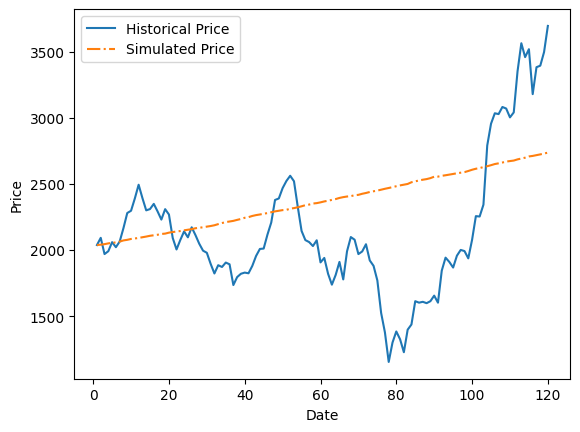

In [9]:
nums = []
for i in range(1,len(data_actual)+1):
    nums.append(i)
plt.plot(nums, data_actual.LTP, label='Historical Price')
plt.plot(nums, sim_df['Mean'], label='Simulated Price', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()    